### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_theme(style="whitegrid", palette="pastel")

### Read dataset

In [2]:
df = pd.read_csv('data/train.csv')

### Exploratory data analysis

##### Basic inspection

In [3]:
shape = df.shape
print(f"Number of rows: {shape[0]}")
print(f"Number of columns: {shape[1]}")

Number of rows: 3000
Number of columns: 20


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3000.0,100.510000,39.485782,1.0,73.0000,100.00,127.0000,233.00
number_vmail_messages,3000.0,7.977333,13.730125,0.0,0.0000,0.00,18.0000,52.00
total_day_minutes,3000.0,180.456533,54.098371,0.0,143.7000,179.40,216.8000,346.80
total_day_calls,3000.0,100.228667,19.763769,0.0,87.0000,101.00,113.0000,165.00
total_day_charge,3000.0,30.678167,9.196706,0.0,24.4300,30.50,36.8600,58.96
total_eve_minutes,3000.0,200.034000,50.127406,22.3,165.8000,199.90,233.7000,363.70
total_eve_calls,3000.0,100.247333,19.761638,12.0,87.0000,101.00,113.0000,169.00
total_eve_charge,3000.0,17.003100,4.260769,1.9,14.0900,16.99,19.8600,30.91
total_night_minutes,3000.0,201.099633,50.863770,0.0,166.9750,201.60,235.2250,395.00
total_night_calls,3000.0,99.939667,19.669680,0.0,87.0000,100.00,113.0000,175.00


In [5]:
df_nan = df[df.isnull().any(axis=1)]
print(f"Rows containing NaN's: {df_nan.shape[0]}")

Rows containing NaN's: 0


### Check for target variable

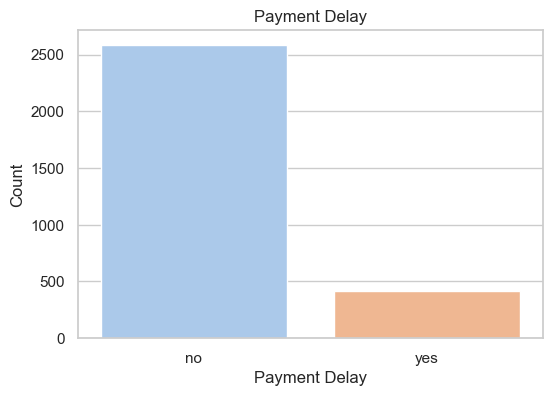

In [6]:
value_counts = df['payment_delay'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Count')
plt.show()

In [7]:
percentage = value_counts / len(df) * 100
print("Percentage of NO and YES:")
print(percentage)

Percentage of NO and YES:
no     86.233333
yes    13.766667
Name: payment_delay, dtype: float64


The result shows the percentage distribution of the two classes in the 'payment_delay' variable.
- The class 'no' represents approximately 86.23% of the data.
- The class 'yes' represents approximately 13.77% of the data.

This indicates an imbalanced dataset, where the majority class ('no') comprises a significantly higher proportion compared to the minority class ('yes').

### Bivariate analysis of categorical features

Bar charts

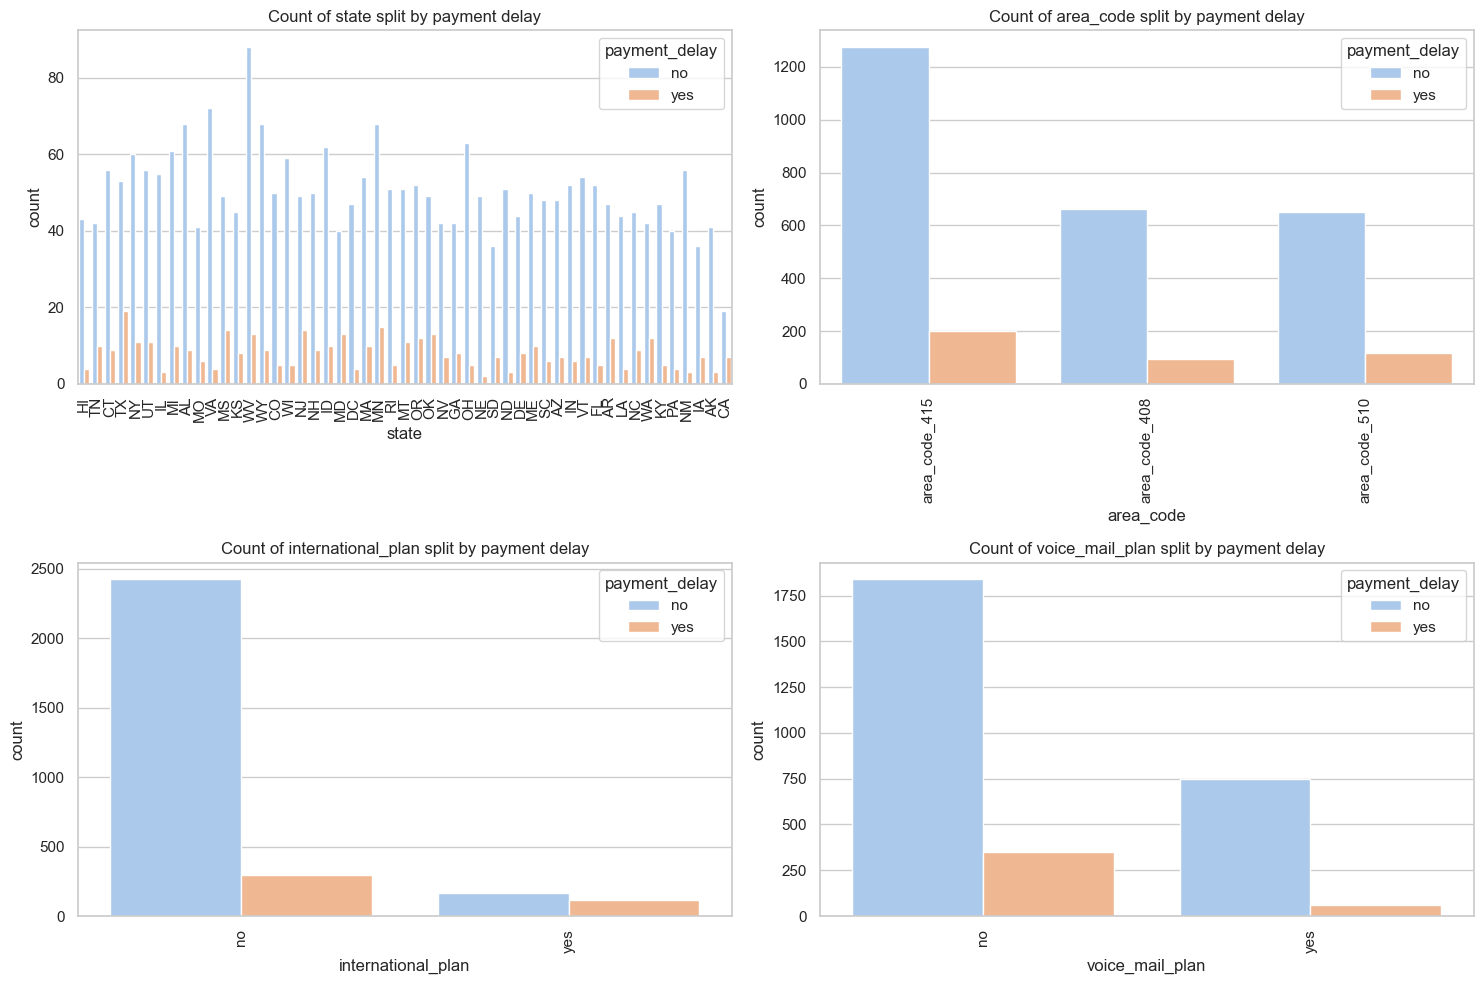

In [8]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != 'payment_delay']

n_rows = 2
n_cols = 2

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='payment_delay')
    plt.title(f"Count of {col} split by payment delay")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Bivariate analysis of numerical features

Box plots

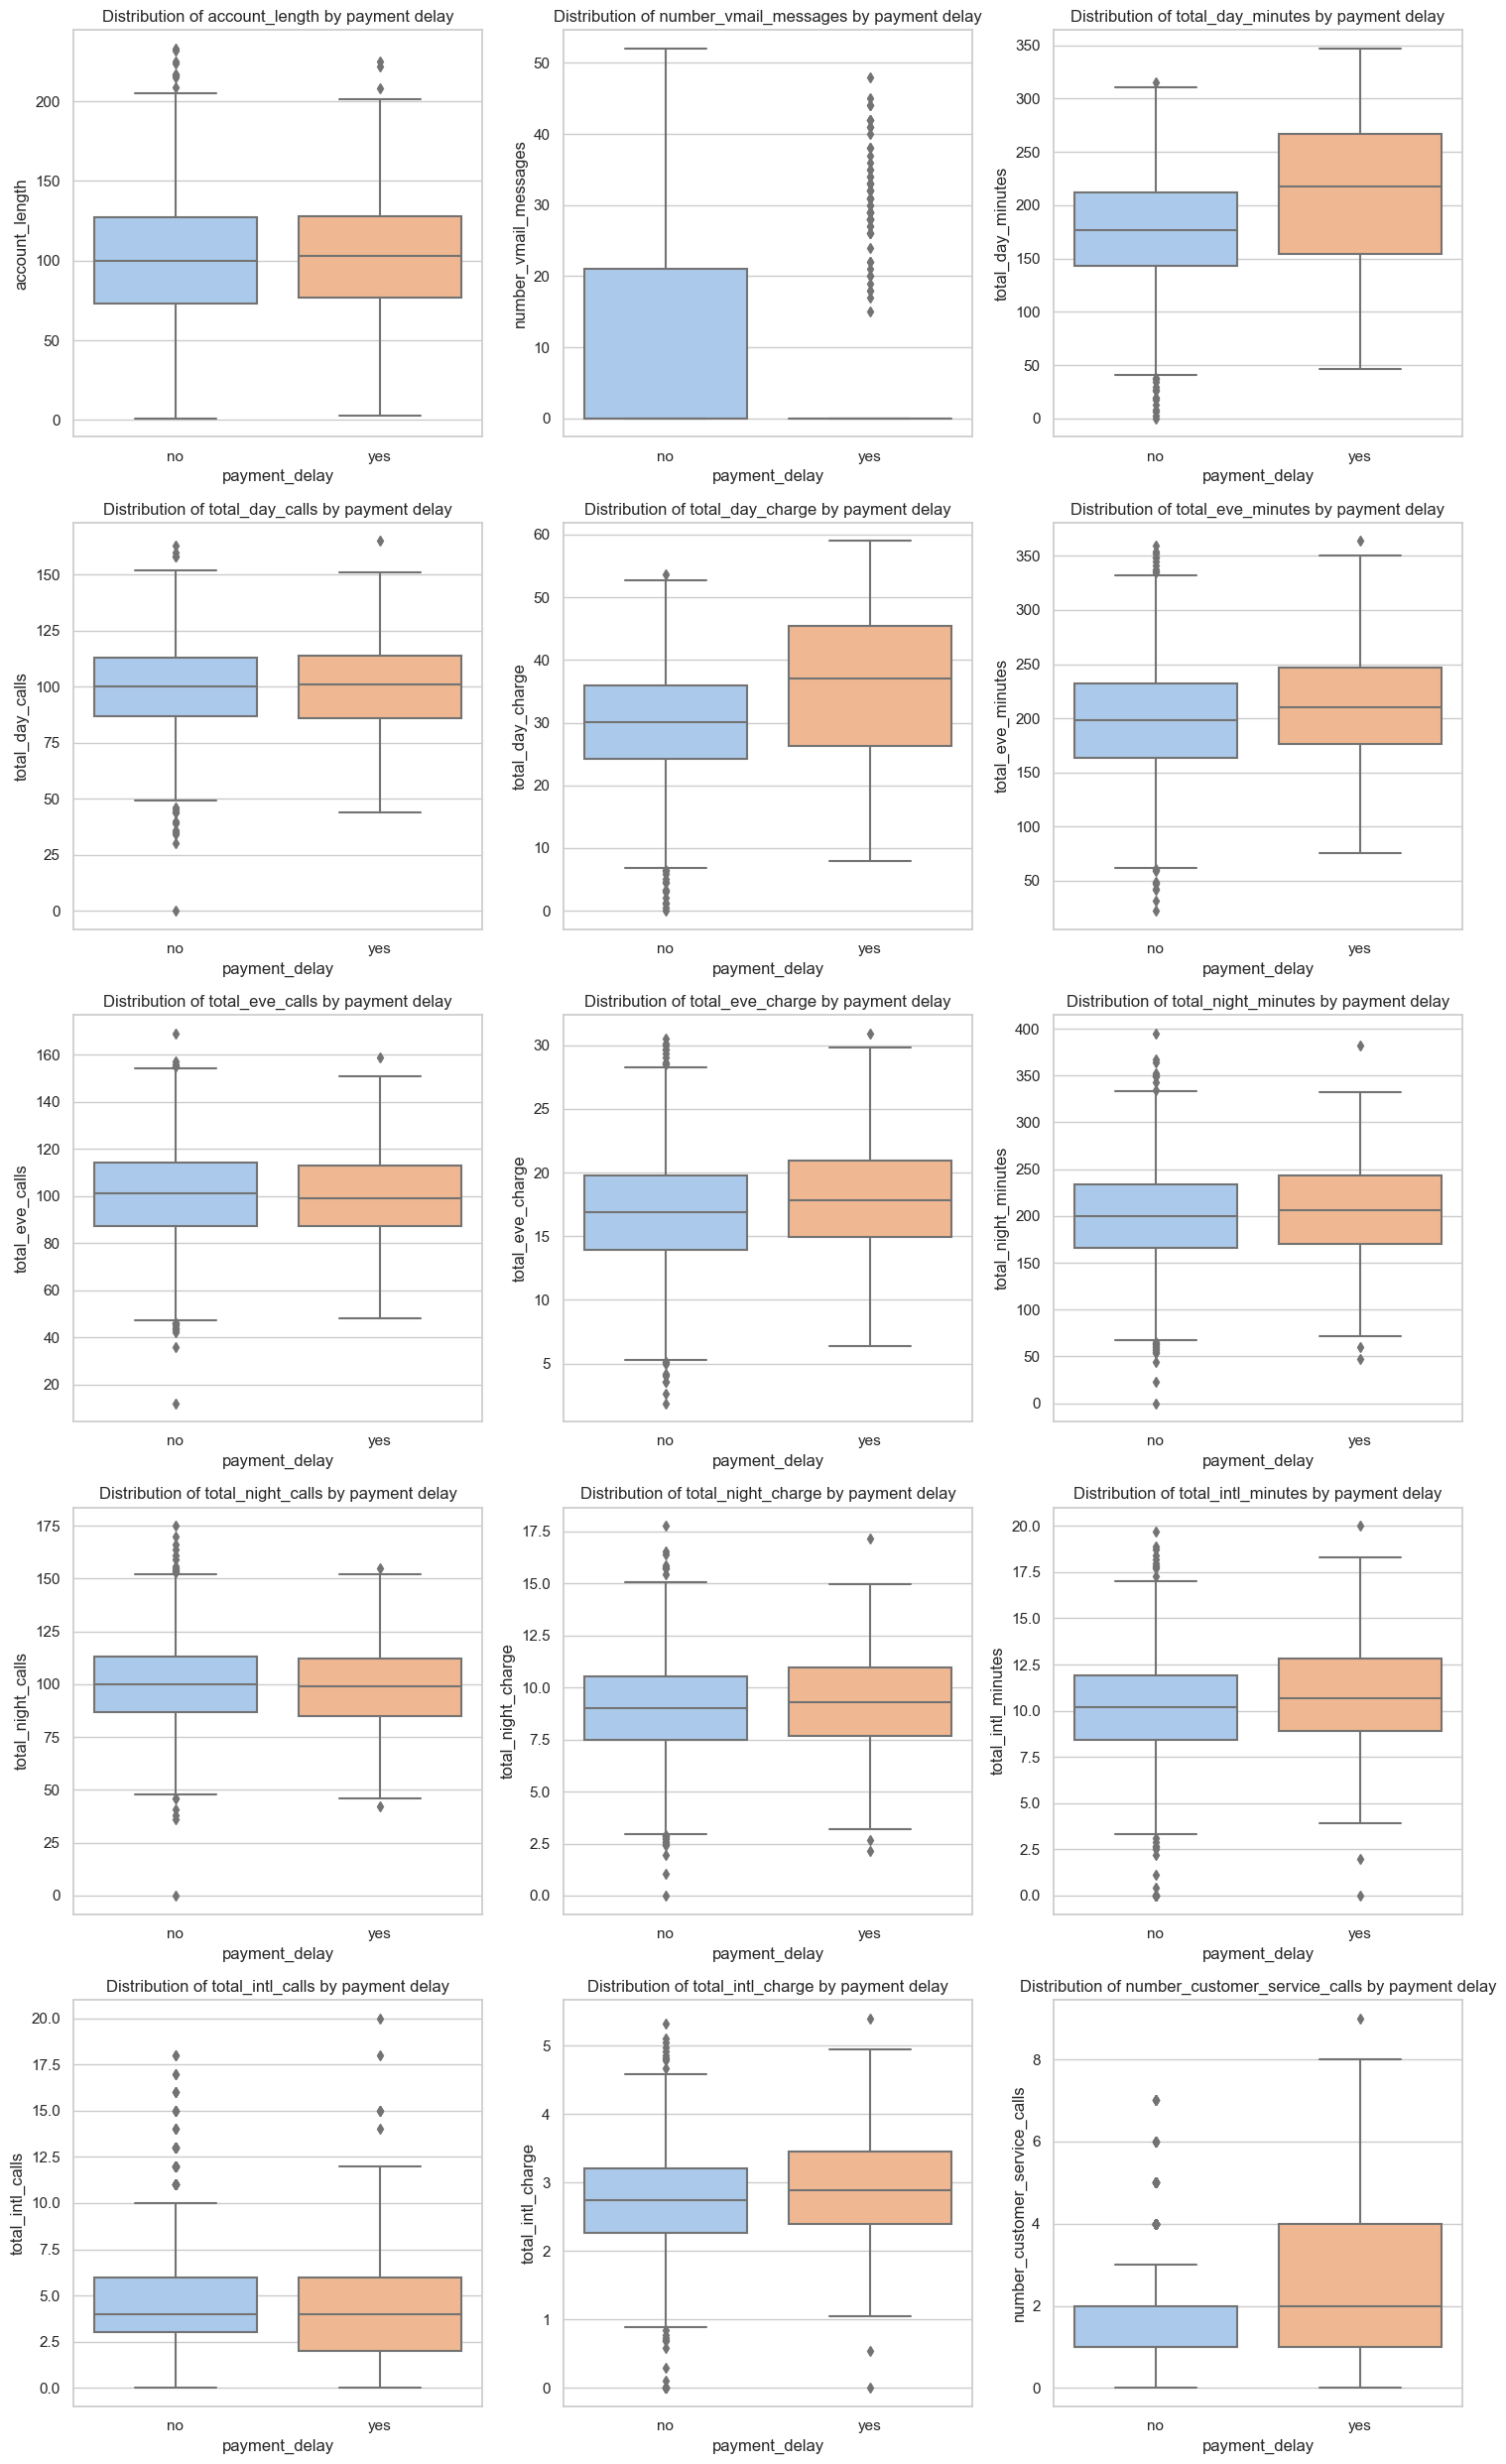

In [9]:
num_cols = df.select_dtypes(include='number').columns
n = len(num_cols)
n_cols = 3  # We are setting 3 plots per row
n_rows = np.ceil(n / n_cols).astype(int)  # Calculate the number of rows based on the number of columns

plt.figure(figsize=(15, n_rows * 5))  # Adjust size based on the number of rows
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='payment_delay', y=col, data=df)
    plt.title(f"Distribution of {col} by payment delay")

plt.tight_layout()
plt.show()

I've decided not to adjust or remove outliers from our data. The common way to handle outliers, the IQR rule, can sometimes remove data points that are actually important. These so-called 'outliers' might represent special cases that are valuable for our model to learn from. The model we're using, called LightGBM, can usually deal with outliers without a problem. So, instead of possibly losing important information by adjusting or removing these outliers, I've decided to keep all the data just as it is.

### Correlation matrix among numerical features

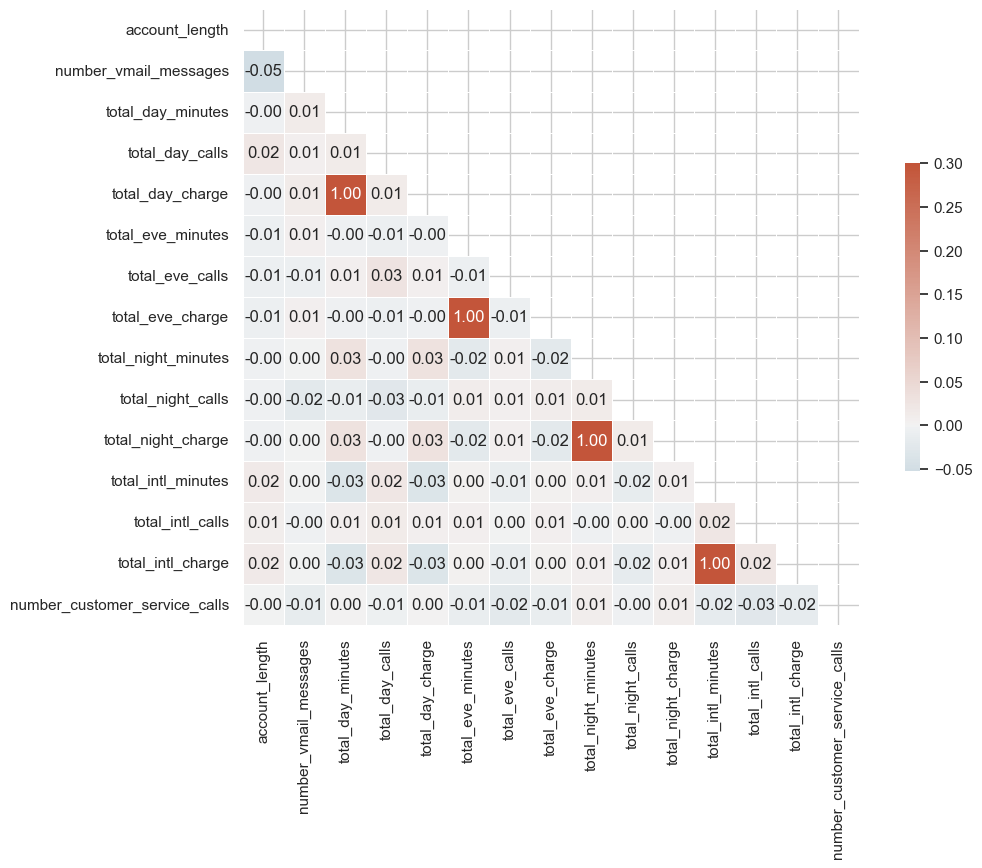

In [10]:
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.show()